In [65]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### Start working on a real dataset

We're going to use the House Price dataset we used last time ([link text](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv))

Try to upload the dataset on your Google Drive and access it through Colab.

In [66]:
# find the file on your system and copy and paste the path here
FILE_PATH = "./train.csv"
df = pd.read_csv(FILE_PATH)

In [59]:
# show all the columns
pd.set_option('display.max_columns', None)

In [60]:
# print the shape of the dataset
df.shape

(1460, 81)

In [61]:
# check the data types
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [62]:
# take a look at the first few records
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
# take a look at the columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [64]:
# look at the correlation of columns with .corr()
corrmat = df.corr()
# plot the correlations with sns.heatmap
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, cmap='coolwarm')


ValueError: could not convert string to float: 'RL'

The highest corrolations are with the following columns:
 Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')


C:\Users\chris\AppData\Local\Temp\ipykernel_23084\474262626.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


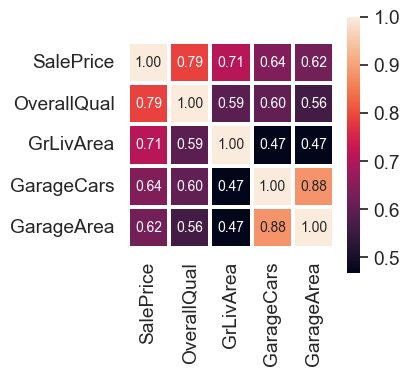

In [ ]:
# run the code bellow to have a better view of corrolations
def plot_corr_matrix(df, nr_c, targ) :
    """
    A function for getting the features with the highest
    corrolation with the target variable.
    """

    # get the values
    corr = df.corr()
    corr_abs = corr.abs()

    # get the names in the largest to smallest order
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    # plot the figure
    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True,
                fmt='.2f', annot_kws={'size': 10},
                yticklabels=cols.values, xticklabels=cols.values)
    print('The highest corrolations are with the following columns:\n', cols)
    plt.show()

plot_corr_matrix(df, nr_c=5, targ='SalePrice')

In [ ]:
# copy the list of columns printed out on the output of previous code cell
# and paste it here
columns_to_use = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']

# filter the above columns of the dataset and save the new dataset into df_sample
df_sample = df[columns_to_use]
df_sample

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea
0,208500,7,1710,2,548
1,181500,6,1262,2,460
2,223500,7,1786,2,608
3,140000,7,1717,3,642
4,250000,8,2198,3,836
...,...,...,...,...,...
1455,175000,6,1647,2,460
1456,210000,6,2073,2,500
1457,266500,7,2340,1,252
1458,142125,5,1078,1,240


In [ ]:
# look into the number of nulls we have in df_sample
df_sample.isnull().sum()


SalePrice      0
OverallQual    0
GrLivArea      0
GarageCars     0
GarageArea     0
dtype: int64

In [ ]:
# take a look at the sampled dataset
df_sample.head()


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea
0,208500,7,1710,2,548
1,181500,6,1262,2,460
2,223500,7,1786,2,608
3,140000,7,1717,3,642
4,250000,8,2198,3,836


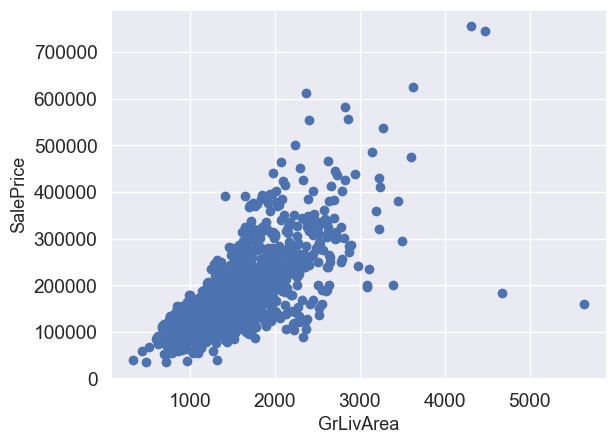

In [ ]:
# plot GrLivArea against SalePrice with a scatter plot
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

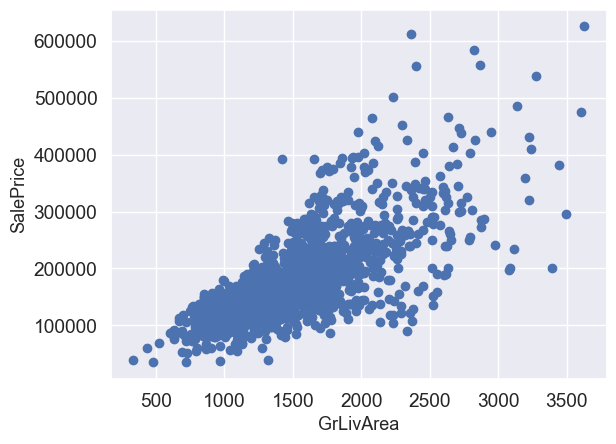

In [ ]:
# Delete the outliers (ones that have GrLivArea more than 4000)
df_sample = df_sample.drop(df_sample[df_sample['GrLivArea'] > 4000].index)

# plot it again
fig, ax = plt.subplots()
ax.scatter(x = df_sample['GrLivArea'], y = df_sample['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


In [ ]:
# create a variable called X_columns and put all the column names
# (except for your target column name) in it
x_columns= list(df_sample.columns)
x_columns.remove('SalePrice')

# filter df_sample based on the x_column_names and your target name
X = df_sample.drop(columns=['SalePrice'])
y = df_sample[['SalePrice']]

# build the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
# import the libraries for regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
print(X_train)
print(y_train)

      OverallQual  GrLivArea  GarageCars  GarageArea
759             8       2531           3         752
599             6       1556           2         452
215             5       1236           1         447
135             7       1682           2         530
372             6        752           1         264
...           ...        ...         ...         ...
717             5       1178           2         439
907             7       2057           1         180
1098            4       1324           1         240
235             6        987           1         264
1063            6       1103           2         440

[1164 rows x 4 columns]
      SalePrice
759      290000
599      151000
215      134450
135      174000
372      125000
...         ...
717      157000
907      250000
1098     128000
235       89500
1063     110500

[1164 rows x 1 columns]


In [ ]:
# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
# Predict on the test set
y_pred = model.predict(X_test)


# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mae_sqrd = np.sqrt(mae)
score = model.score(X_test, y_test)

print(f"Mean Squared Error: {mae}")
print(f"Score: {score}")

Mean Squared Error: 25822.382774798756
Score: 0.7849169922003632


In [ ]:
# Initialize and train a Ridge regression model


# Make predictions


# Evaluate the model




In [ ]:
# Initialize and train a Lasso regression model


# Make predictions


# Evaluate the model


In [ ]:
import matplotlib.pyplot as plt
col = 'GrLivArea'

plt.figure(figsize=(10, 6))

# Add a reference line for a perfect prediction (y_test = predictions)


# Create a scatter plot for Linear Regression


# Create a scatter plot for Ridge Regression


# Create a scatter plot for Lasso Regression



# Set plot labels and title


# Show the plot


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

* How are weights calculated: [link](https://towardsdatascience.com/step-by-step-tutorial-on-linear-regression-with-stochastic-gradient-descent-1d35b088a843)

* Why is Lasso harder on coefficients in comparison to Ridge? [link](https://online.stat.psu.edu/stat508/lesson/5/5.4)

* Regression requirements: [link](https://www.youtube.com/watch?v=0MFpOQRY0rw&ab_channel=zedstatistics)

* Linear regression in sklearn: [link](https://scikit-learn.org/stable/modules/linear_model.html#linear-models)

* Lasso Regression


### Add and convert categorical columns to numerical

In [ ]:
catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual',
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

In [ ]:
for catg in catg_strong_corr :

    # Set the figure size
    plt.figure(figsize=(10, 6))

    # build the figure config


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
# filter the dataset based on the following columns
columns_to_use = ['LotArea', 'YrSold', 'GarageArea', 'GarageYrBlt',
                  'GrLivArea', 'OverallQual', 'ExterQual', 'YearBuilt',
                  'MSZoning', 'KitchenQual',
                  'SalePrice']

# save the new dataset into df_sample


In [ ]:
# take a look at the dataset


In [ ]:
# look into the number of nulls we have
# (sort the values to have the emptiest column on top)


In [ ]:
# fillna with mean for: GarageYrBlt, MasVnrArea


In [ ]:
# fill MSZoning with the most frequently seen value


In [ ]:
# import the label encoder
from sklearn.preprocessing import LabelEncoder

# create a second dataset from the first dataset


# define the categorical columns
cols = ('KitchenQual', 'ExterQual', 'MSZoning', 'OverallQual')

# process columns, apply LabelEncoder to categorical features



In [ ]:
# look at the transformed version
# is everything looking good?


In [ ]:
# create a second dataset from the first dataset


In [ ]:
# use ordinal encoder to transform kitchen quality (KitchenQual)
from sklearn.preprocessing import OrdinalEncoder

order = ['Fa','TA','Gd','Ex']
columns_with_order = ['ExterQual', 'KitchenQual']


In [ ]:
# take a look at the kitchQual in df_sample


In [ ]:
# take a look at the kitchQual in df


In [ ]:
# Specify the columns to be one-hot encoded
# Perform one-hot encoding


# Concatenate the encoded columns with the original dataset


# Display the modified dataset


In [ ]:
# drop the columns you transformed and keep the converted versions
df_transformed.drop(columns=['KitchenQual', 'ExterQual', 'MSZoning', 'OverallQual'], inplace=True)

NameError: name 'df_transformed' is not defined

In [ ]:
# define the variables we want to use for X
X_columns = ...

# create X and y
X = ...
y = ...

# build the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_test

In [ ]:
X_train

In [ ]:
# Initialize and train a linear regression model


# Make predictions


# Evaluate the model


In [ ]:
# Initialize and train a Ridge regression model

# Make predictions


# Evaluate the model


In [ ]:
# Initialize and train a Lasso regression model


# Make predictions


# Evaluate the model



In [ ]:
import matplotlib.pyplot as plt
col = 'GrLivArea'

plt.figure(figsize=(10, 6))

# Add a reference line for a perfect prediction (y_test = predictions)


# Create a scatter plot for Linear Regression


# Create a scatter plot for Ridge Regression


# Create a scatter plot for Lasso Regression


# Set plot labels and title


# Show the plot



### Optional for now

### What if we didn't have normalized features?


In [ ]:
# Calculate the mean and standard deviation for each feature
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)

# Normalize the features using z-score standardization
X_normalized = (X - mean) / std_dev

# Now, X_normalized contains your normalized features
X_normalized

In [ ]:
#  other ways of doing this
from sklearn.preprocessing import StandardScaler

# Assuming you have a numpy array called 'X' containing your features
# X.shape should be (number_of_samples, number_of_features)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your data and transform the features
X_normalized = scaler.fit_transform(X)

# X_normalized contains your z-score standardized features
X_normalized

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a numpy array called 'X' containing your features
# X.shape should be (number_of_samples, number_of_features)

# Create a MinMaxScaler instance (by default, scales to [0, 1])
scaler = MinMaxScaler()

# Fit the scaler to your data and transform the features
X_normalized = scaler.fit_transform(X)

# X_normalized contains your min-max scaled features
X_normalized